<a href="https://colab.research.google.com/github/JimLavrenz/notebooks/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iterations:  7
Final centroids: 
 [[ 2.09874471  0.8797929 ]
 [-1.55076244  2.93708061]
 [ 0.90656438  4.27562312]]


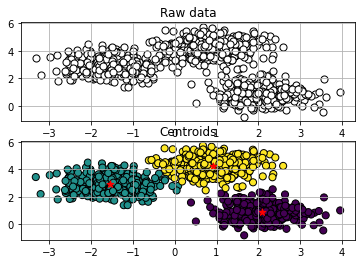

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#set set to 0 for reproducibility
np.random.seed(0)

points = 1000
clusters = 3
max_iterations = 100
dimensions = 2

# create dataset
x, y = make_blobs(
   n_samples=points, n_features=2,
   centers=clusters, cluster_std=0.6,
   shuffle=True, random_state=0
)

centroids = np.zeros(shape = (clusters, dimensions))

#grab a random point as the centroid for starting
for i in range(clusters):
   centroids[i:] = x[np.random.randint(0, points, dtype='l')]

prev_centroids = centroids

#print('Initial centroids: \n', centroids)

dist = np.zeros(clusters)
centroid_index = np.zeros(points, dtype=int)

iteration = 0
while True:
   # Calculate Euclidean distance for each data point from each centroid
   for i in range(points):
      for j in range(clusters):
         dist[j] = np.sqrt(np.square(x[i, 0] - centroids[j, 0]) \
         + np.square(x[i, 1] - centroids[j, 1]))
      # Get the indices of minimum element in numpy array
      dist_index = np.where(dist == np.amin(dist))
      centroid_index[i] = dist_index[0]

   points_in_clusters = np.zeros(clusters, dtype=int)

   del(centroids)
   centroids = np.zeros(shape = (clusters, dimensions))

   for i in range(points):
      centroids[centroid_index[i], 0] += x[i, 0]
      centroids[centroid_index[i], 1] += x[i, 1]
      points_in_clusters[centroid_index[i]] += 1

   for i in range(clusters):
      centroids[i, 0] /= points_in_clusters[i]
      centroids[i, 1] /= points_in_clusters[i]

   comparison = centroids == prev_centroids

   if comparison.all():
      break
   else:
      prev_centroids = centroids

   iteration += 1
   if iteration == max_iterations:
       break
   #print('Iteration: ', iteration)
   #print('new centroids: \n', centroids)

print('Iterations: ', iteration + 1)
print('Final centroids: \n', centroids)

# plot raw data
plt.subplot(2, 1, 1)
plt.scatter(
   x[:, 0], x[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50
)
plt.title('Raw data')
plt.grid(True)

# plot colored clusters
plt.subplot(2, 1, 2)
plt.scatter(
   x[:, 0], x[:, 1],
   c=centroid_index, marker='o',
   edgecolor='black', s=50
)
#overlay centroids in red to colored clusters
plt.scatter(
   centroids[:, 0], centroids[:, 1],
   c='red', marker='*',
   edgecolor='red', s=50
)

plt.title('Centroids')
plt.grid(True)
plt.show()
